In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
# data.info()

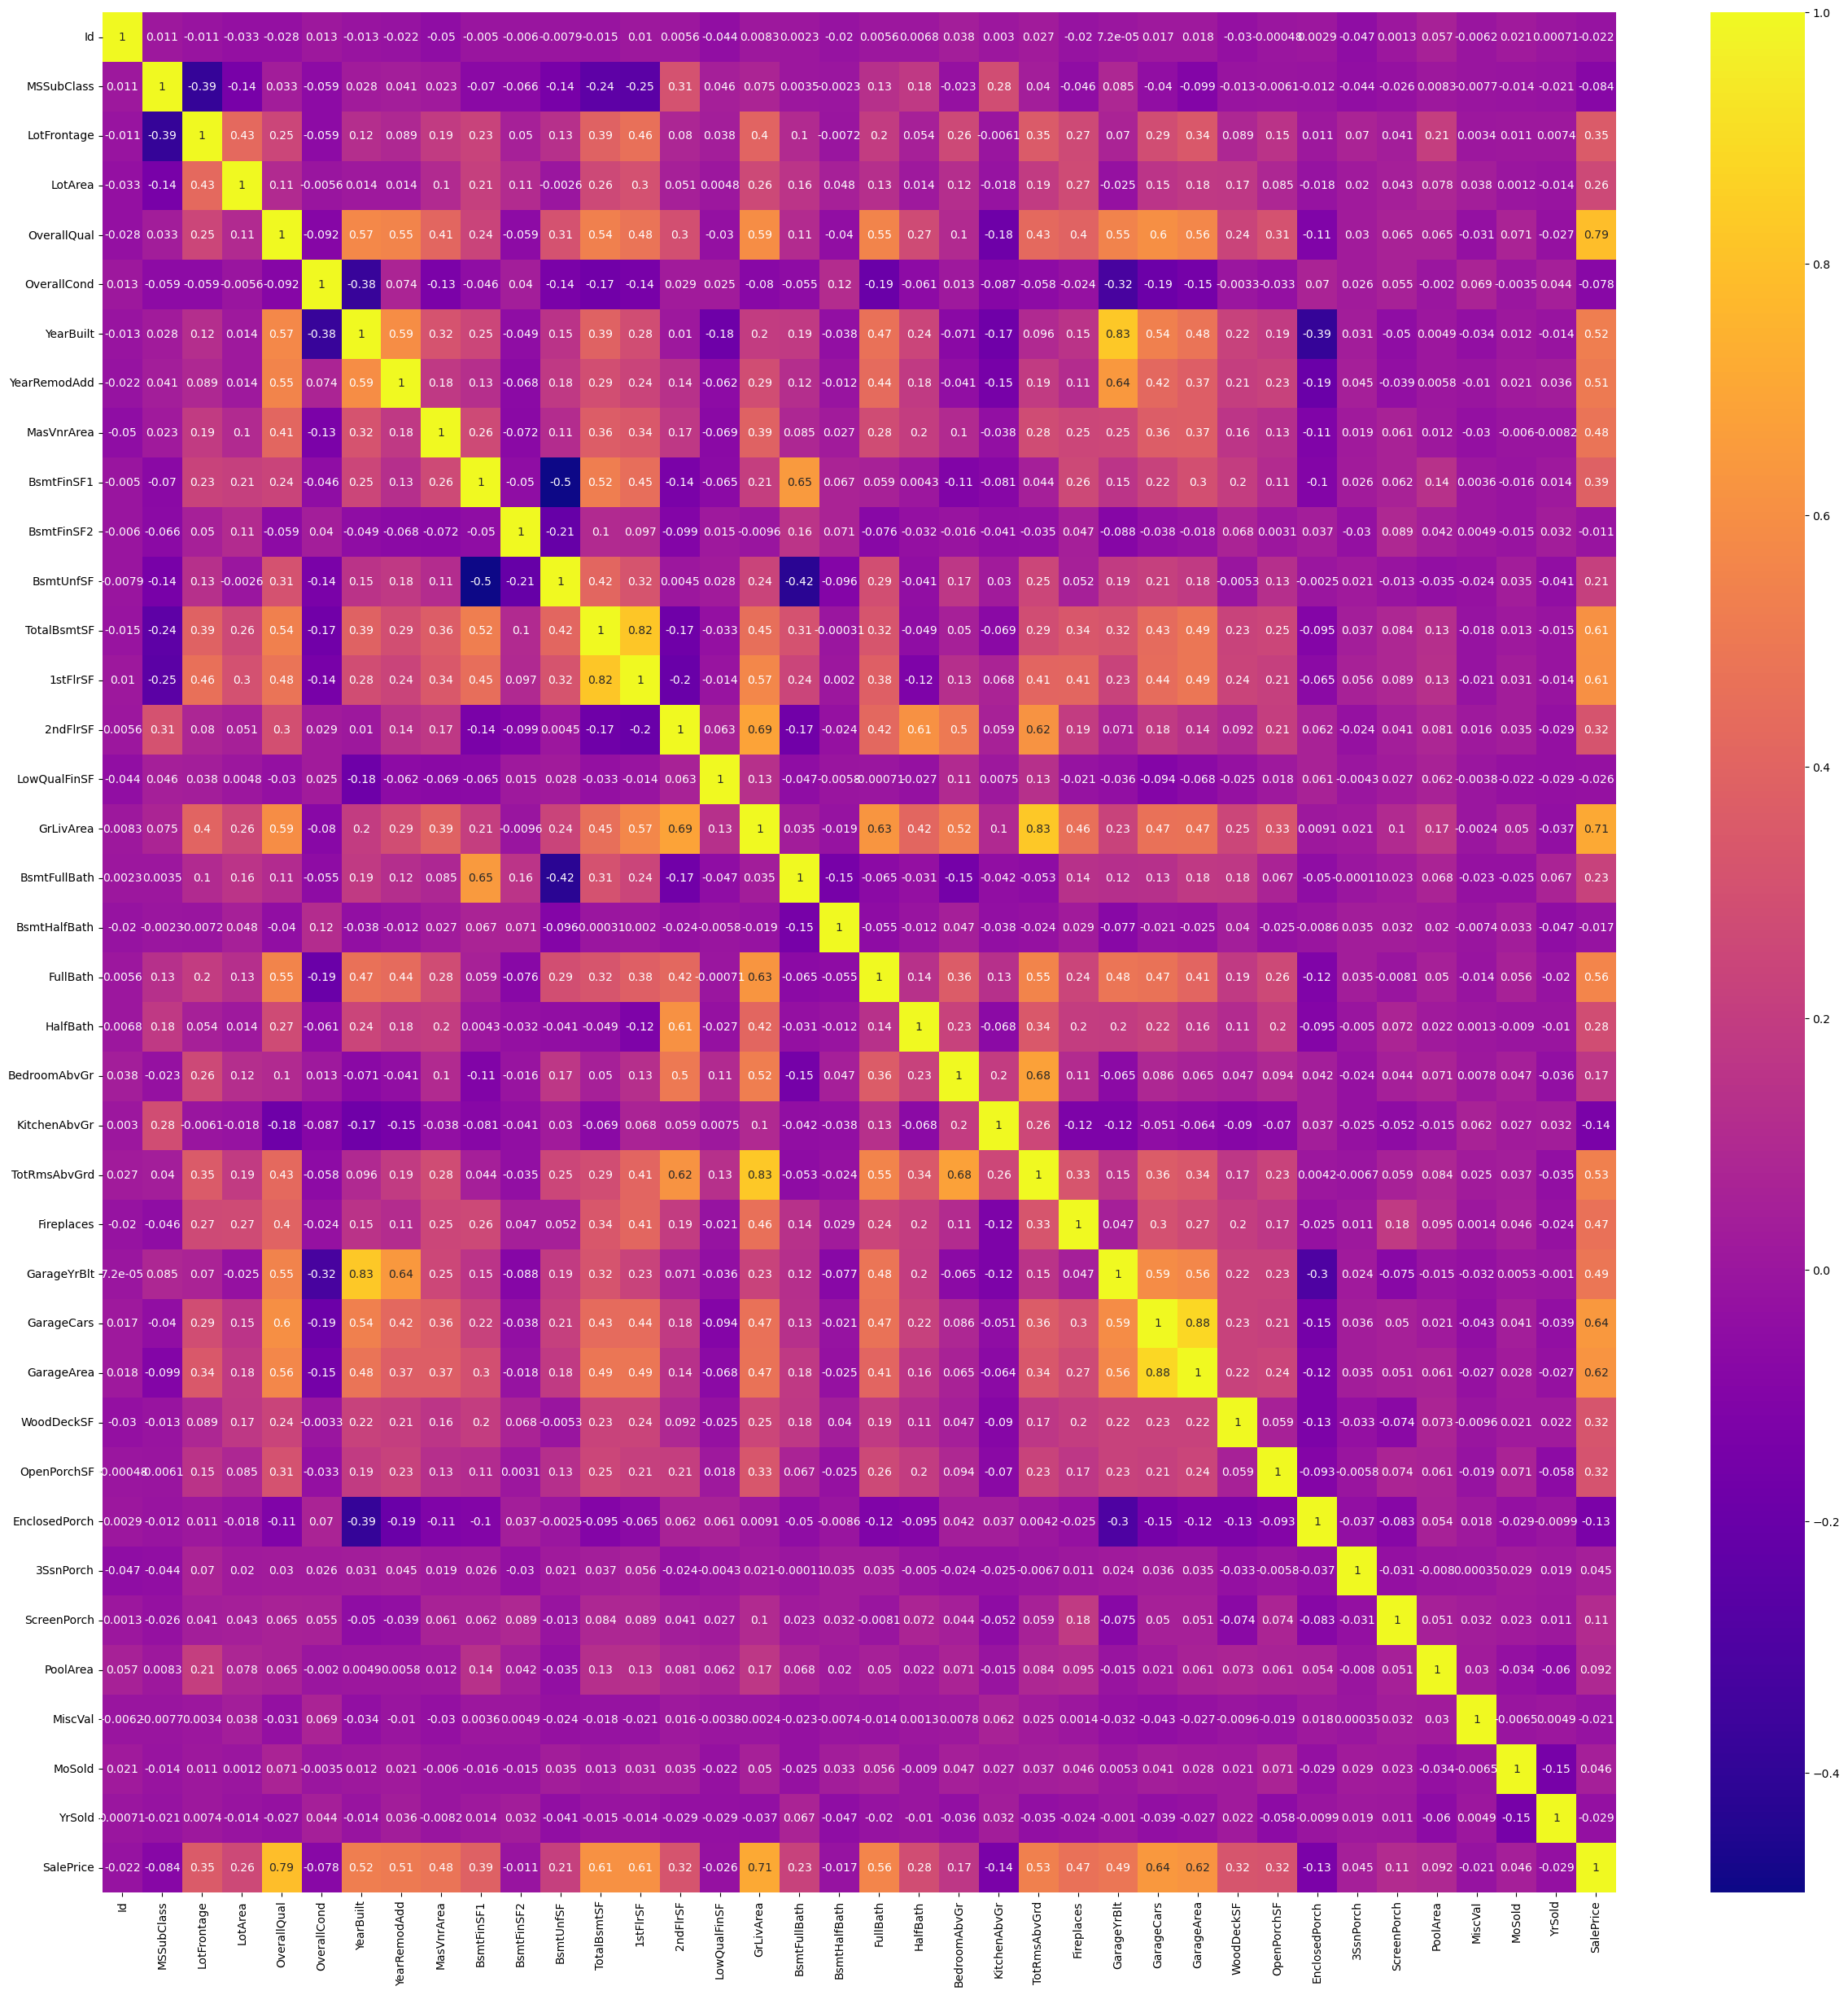

In [5]:
# correlation matrix
cor = data.corr()
# correlation matrix heatmap
plt.figure(figsize=(30,30))
sns.heatmap(cor, annot = True, cmap="plasma")
plt.show()

In [6]:
# we'll start by dropping some of the features as they're missing too many values
main_df = data.drop(columns=['Id','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [7]:
test_df = pd.read_csv('test.csv')
test_df.drop(columns=['Id','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True, axis=1)

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

class FeatureImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['MSSubClass'] = imputer.fit_transform(X[['MSSubClass']])
        X['LotFrontage'] = imputer.fit_transform(X[['LotFrontage']])
        X['GarageYrBlt'] = imputer.fit_transform(X[['GarageYrBlt']])
        X['MasVnrArea'] = imputer.fit_transform(X[['MasVnrArea']])
        return X

In [9]:
class DataScaling(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.num_cols = []
#         self.scaler = MinMaxScaler()
        self.scaler = StandardScaler()
    
    def fit(self, X, y=None):
        self.num_cols = X.select_dtypes(include=np.number).columns
        self.scaler.fit(X[self.num_cols])
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        X_transformed[self.num_cols] = self.scaler.transform(X_transformed[self.num_cols])
        return X_transformed

In [10]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        encoder = OneHotEncoder()
        
        for col in X.select_dtypes(include='object').columns:
            column_names = []
            matrix = encoder.fit_transform(X[[col]]).toarray()
            
            column_names.append(X[col].unique())
            column_names = column_names[0]
            for i in range(len(matrix.T)):
                X[column_names[i]] = matrix.T[i]
            
            X.drop([col], inplace = True, axis=1)
            
        return X

In [11]:
from sklearn.pipeline import Pipeline

pipeline_1 = Pipeline([("featureimputer", FeatureImputer()),
                        ("datascaling", DataScaling())])

pipeline_2 = Pipeline([("featureencoder", FeatureEncoder())])

In [12]:
main_df_no_SalePrice = main_df.drop(['SalePrice'], axis=1)
temp_ds = pd.concat([main_df_no_SalePrice, test_df], ignore_index=True)
temp_ds = pipeline_1.fit_transform(temp_ds)
temp_ds = pipeline_2.fit_transform(temp_ds)
main_df = temp_ds.iloc[:1460,:]
test_df = temp_ds.iloc[1460:,:]


# df_train = final_df.iloc[:1460,:]
# test_df = final_df.iloc[1460:,:]

main_df['SalePrice'] = data['SalePrice']

C:\Users\shkal\AppData\Local\Temp\ipykernel_19232\3780825734.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['SalePrice'] = data['SalePrice']


In [13]:
final_df = main_df

In [14]:
final_df.shape

(1460, 205)

In [15]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]
final_df.shape

(1460, 205)

In [16]:
X = final_df.drop(['SalePrice'], axis=1)
X.columns = X.columns.astype(str)

y = final_df['SalePrice']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

reg = LinearRegression()
sfs = SequentialFeatureSelector(reg, n_features_to_select=50)

sfs.fit(X_train, y_train) #selecting the best features for predicting this target
print("Completed")

Completed


In [19]:
predictors = list(X_train.columns[sfs.get_support()])
predictors

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 '3SsnPorch',
 'MoSold',
 'RL',
 'FR2',
 'Corner',
 'Sev',
 'NoRidge',
 'NWAmes',
 'NAmes',
 'IDOTRR',
 'Edwards',
 'Timber',
 'Blmngtn',
 'BrDale',
 'Blueste',
 'Feedr',
 '2fmCon',
 'Duplex',
 'Metal',
 'HdBoard',
 'Wd Shng',
 'CmentBd',
 'Brk Cmn',
 'Ex',
 'BrkTil',
 'No',
 'Mn',
 'Av',
 'GLQ',
 'Grav',
 'Attchd',
 'RFn',
 'New',
 'ConLw',
 'Alloca']

In [20]:
#Using the best columns to fit the model
reg.fit(X_train[predictors], y_train)

LinearRegression()

In [21]:
reg.score(X_test[predictors],y_test)

0.7471452701071026

In [22]:
test_df = test_df.fillna(method='ffill')

In [23]:
predictions = reg.predict(test_df[predictors])

In [24]:
predictions

array([121873.6582295 , 168584.99015366, 186600.33333536, ...,
       165237.44843844, 116359.64694042, 231957.2248026 ])

In [25]:
add_id = pd.read_csv('test.csv')

In [26]:
final_df = pd.DataFrame(add_id['Id'])
final_df['SalePrice'] = predictions
final_df.to_csv('predictions.csv', index= False)

In [27]:
import pandas as pd

In [28]:
import xgboost
classifier = xgboost.XGBRegressor()
regressor = xgboost.XGBRegressor()

In [29]:
booster = ['gbtree', 'gblinear']
base_score = [0.25,0.5,0.75,1]

In [30]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV

## Hyper Parameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [31]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_ite

In [48]:
from IPython.core.display import display

In [51]:
temp = random_cv.best_estimator_
display(temp)

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [52]:
regressor=xgboost.XGBRegressor(random_cv.best_estimator_)
# regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
#        colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
#        max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
#        n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
#        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#        silent=True, subsample=1)

In [42]:
regressor

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshol...
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=2, max_leaves=None,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints=None, n

In [54]:
regressor.fit(X_train, y_train)

XGBoostError: [21:01:35] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


In [39]:
predictions = predictions = regressor.predict(X_train)

XGBoostError: [20:39:16] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\c_api\c_api_utils.h:167: Invalid missing value: null